In [2]:

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from musetools import io as io
from musetools import spec as s
from musetools import util as u
from astropy.wcs import WCS
import math as m
import pdb
from astropy.io import ascii
from astropy.table import Table
import getpass

username=getpass.getuser()

if username == 'bordoloi':
	fitsfile = '/Users/bordoloi/Dropbox/MUSE/LensedArc/RCS0327_16mc_zap.fits'
else:
	fitsfile = '/home/ahmed/astro/data/RCS0327_16mc_zap.fits'

wave, data, var, header = io.open_muse_cube(fitsfile)

xcen = [114,114,115,118,121,124,127,133,137,141,148,153,160,166,170,177,185,191,198,203,208,213,220,225,231,238,244,246,244,240,238,242]
ycen = [226,233,237,241,244,248,252,257,260,264,269,271,274,274,274,274,274,272,271,270,268,266,263,259,255,249,244,240,237,234,228,224]
print(data.shape)
def spectrum(wave, data, cx, cy):
    flx, flx_er = s.extract_square(cx, cy, wave, data, var, 5)
    #minindex = 0
    #maxindex = 3802
    # Getting rid of NaN values in the flux
    q1 = np.where(np.isnan(flx))
    wave = np.delete(wave, q1)
    flx =  np.delete(flx, q1)
    flx_er = np.delete(flx_er, q1)
    # Getting rid of negative flux values
    q2 = np.where(flx < 0.)
    wave = np.delete(wave, q2)
    flx = np.delete(flx, q2)
    flx_er = np.delete(flx_er, q2)
    dat = Table([wave, flx, flx_er], names=['wave', 'flx', 'flx_er'])
    ascii.write(dat, '/home/ahmed/astro/spectra/spectrum_tot_'+str(cx)+'_'+str(cy)+'.dat',overwrite=True)
    return
for cx, cy in zip(xcen, ycen):
    spectrum(wave, data, cx, cy)
'''
wave, flx, flx_er=spectrum(wave,data, 114, 226)
plt.step(wave,flx)
plt.step(wave,flx_er)
plt.show()
'''

(3802, 349, 352)


'\nwave, flx, flx_er=spectrum(wave,data, 114, 226)\nplt.step(wave,flx)\nplt.step(wave,flx_er)\nplt.show()\n'

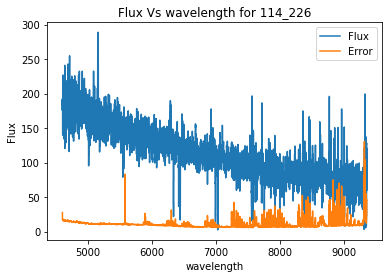

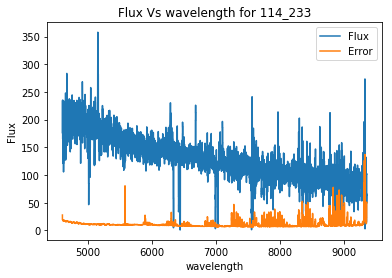

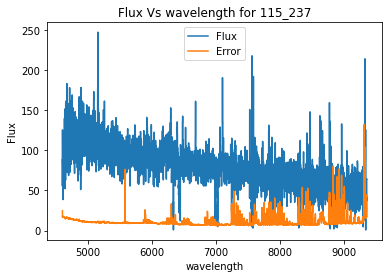

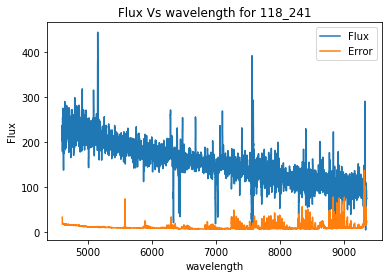

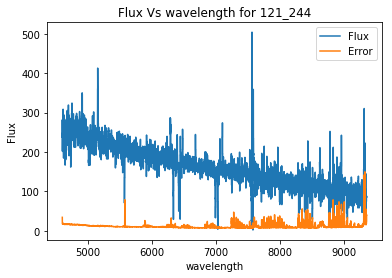

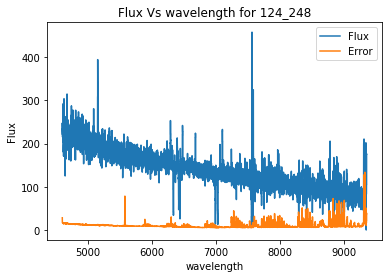

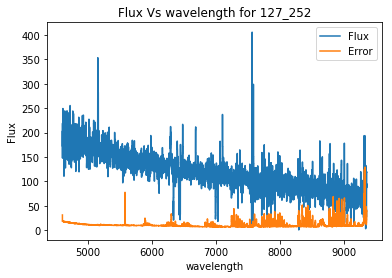

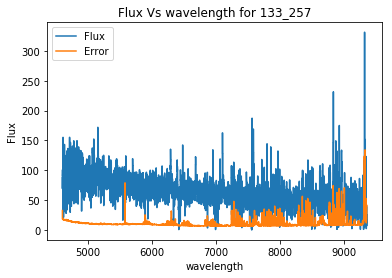

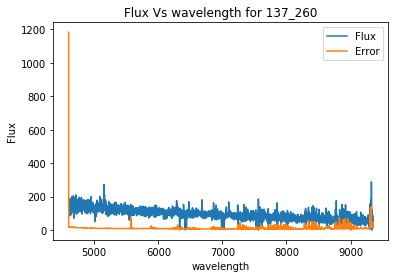

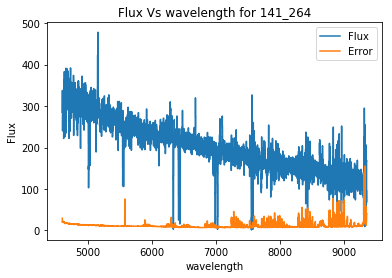

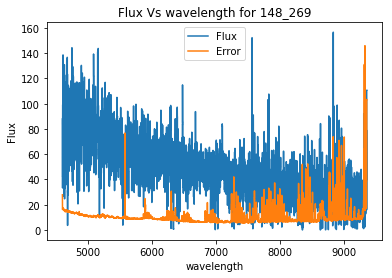

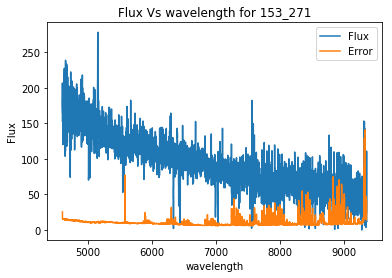

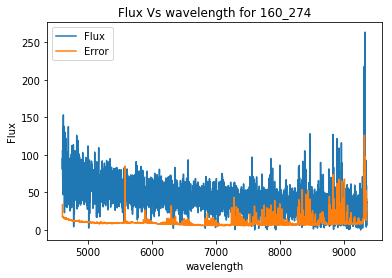

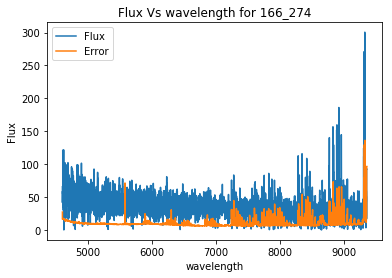

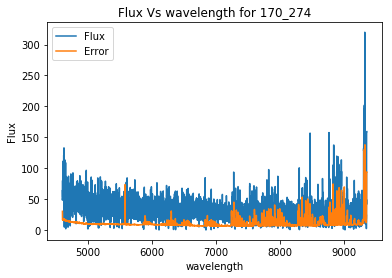

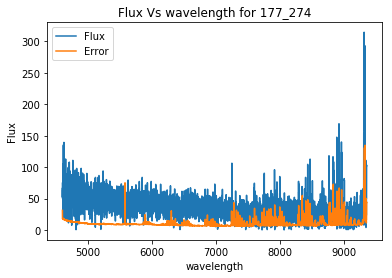

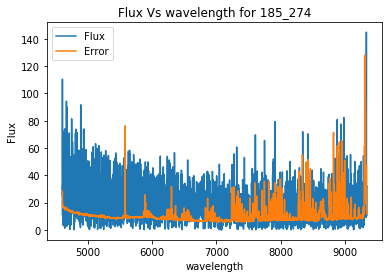

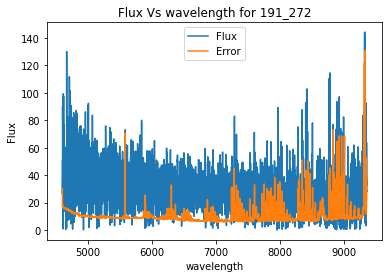

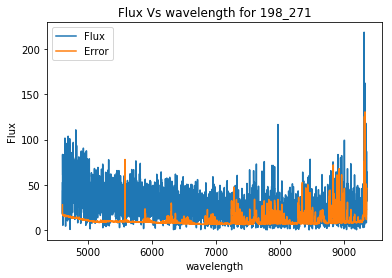

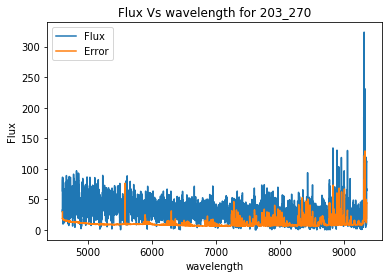

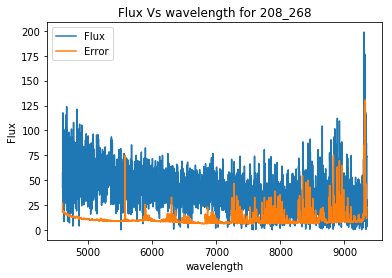

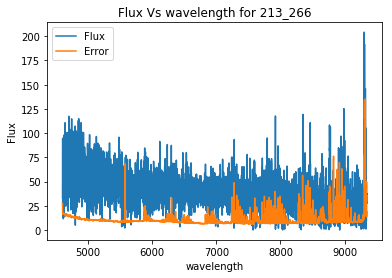

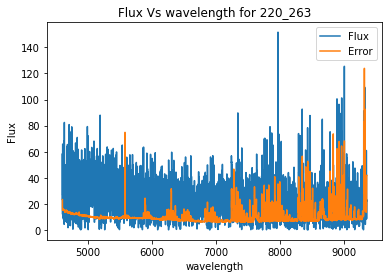

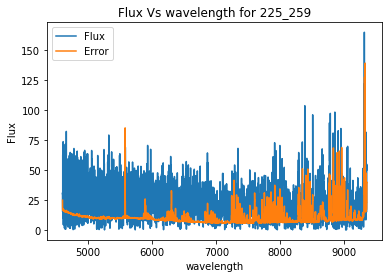

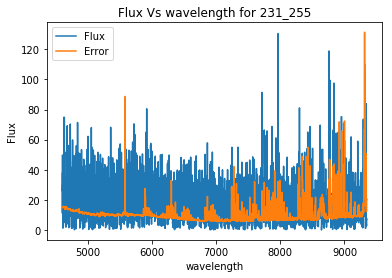

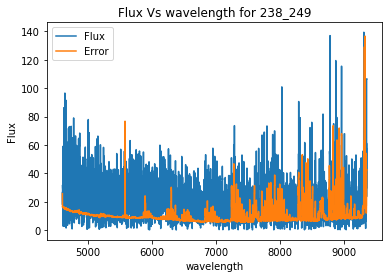

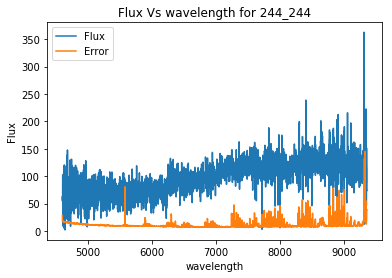

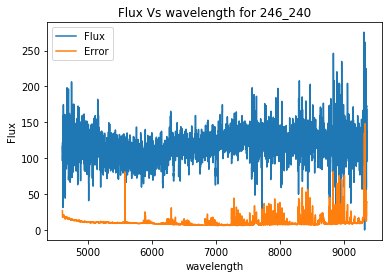

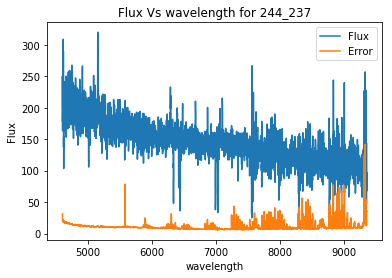

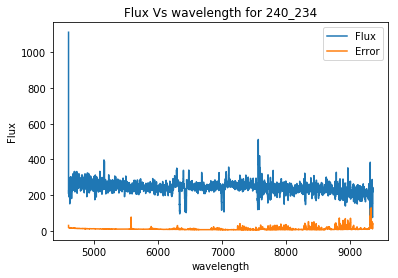

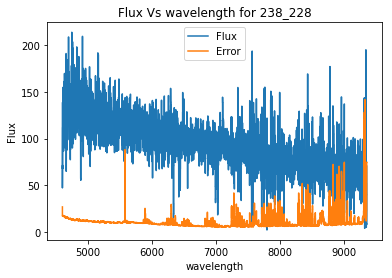

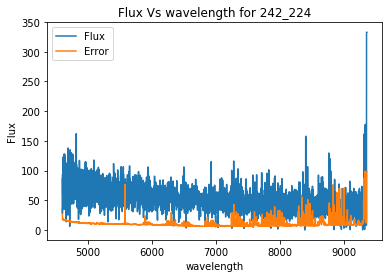

In [18]:
for cx, cy in zip(xcen, ycen):
    data = ascii.read('/home/ahmed/astro/spectra/spectrum_tot_'+str(cx)+'_'+str(cy)+'.dat')
    wave = data[0][:]
    flx = data[1][:]
    flx_er = data[2][:]
    fig, ax = plt.subplots()
    ax.step(wave,flx,label='Flux')
    ax.step(wave,flx_er,label='Error')
    ax.set_xlabel('wavelength')
    ax.set_ylabel('Flux')
    ax.set_title('Flux Vs wavelength for '+str(cx)+'_'+str(cy)+'')
    ax.legend(loc=0)
    fig.savefig('/home/ahmed/astro/figures/spectra/FluxVsWave_'+str(cx)+'_'+str(cy)+'.pdf')
    plt.show()

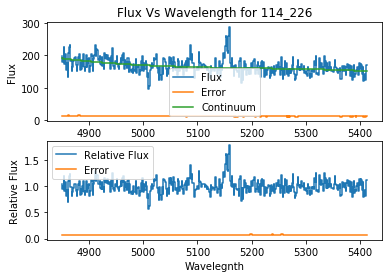

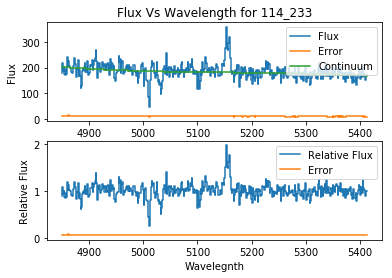

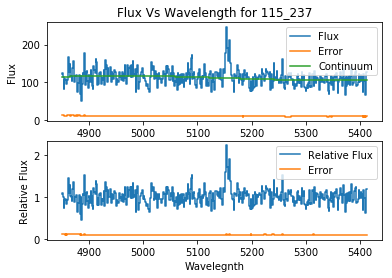

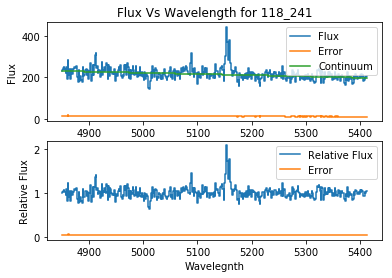

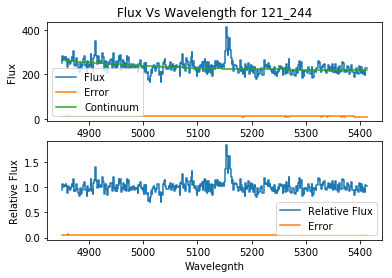

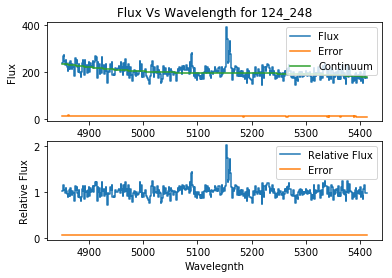

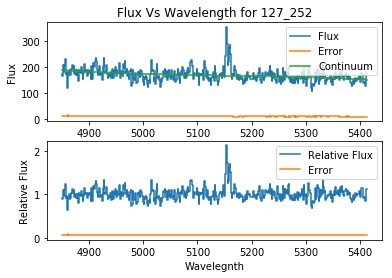

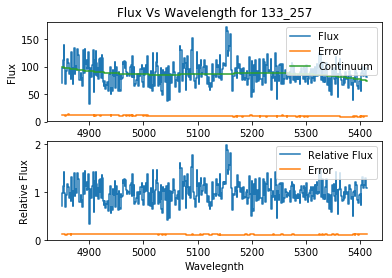

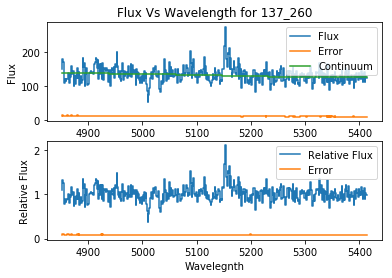

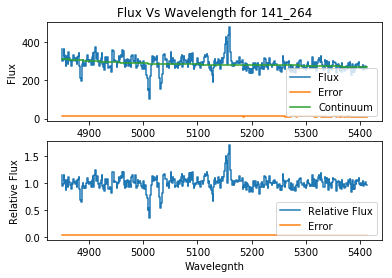

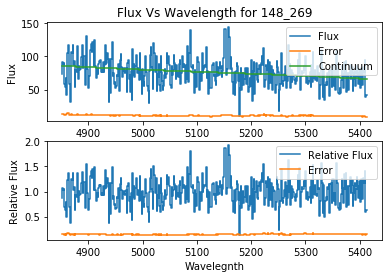

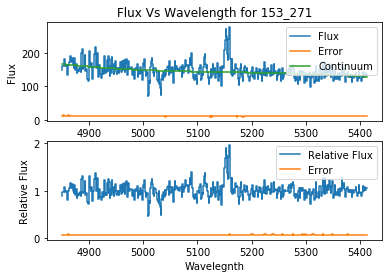

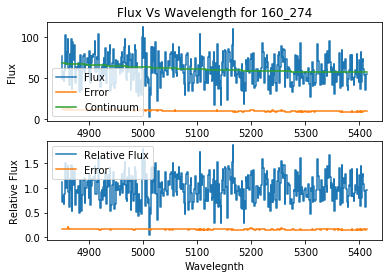

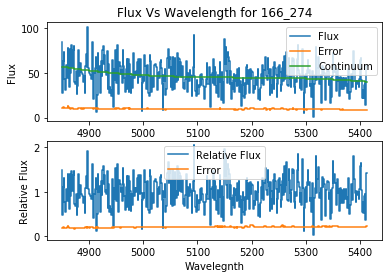

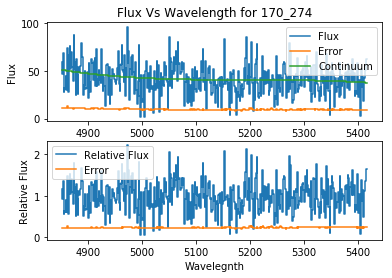

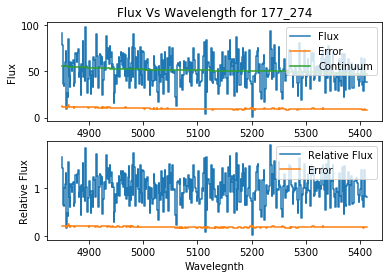

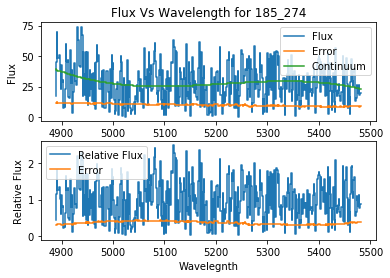

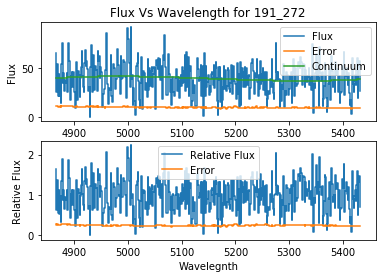

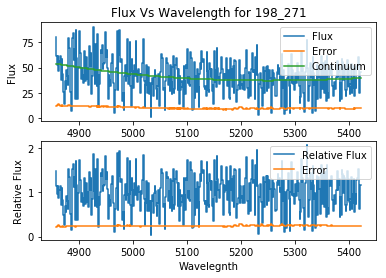

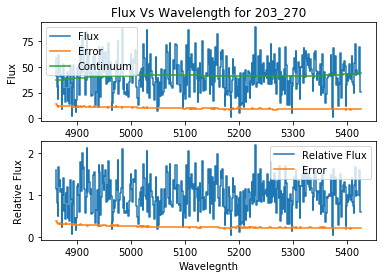

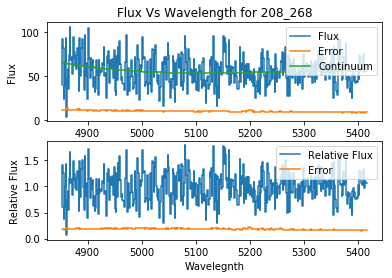

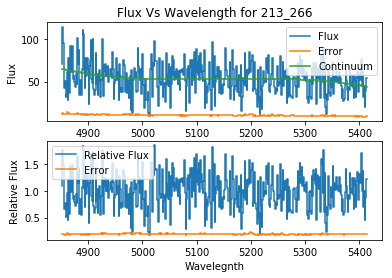

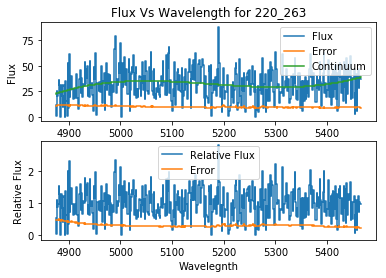

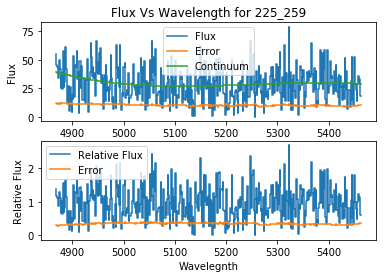

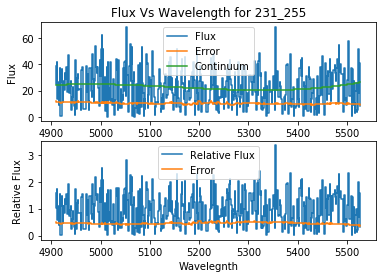

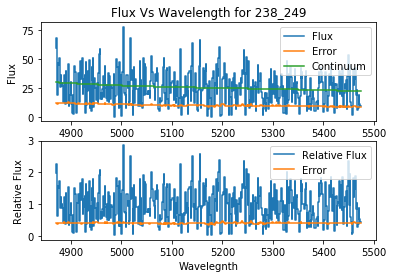

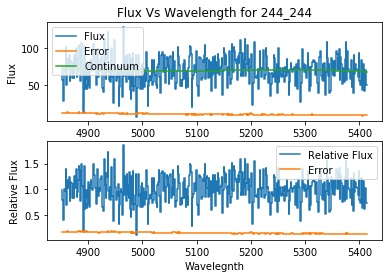

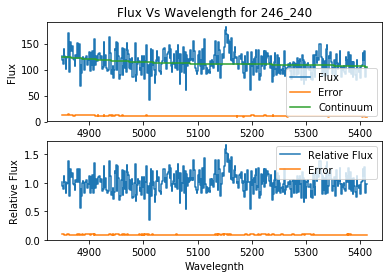

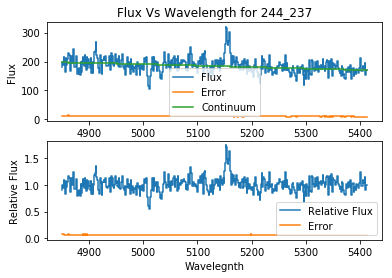

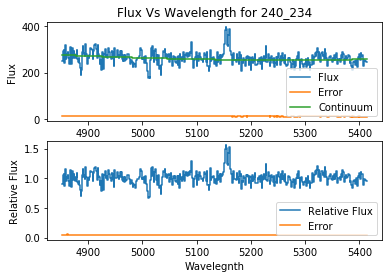

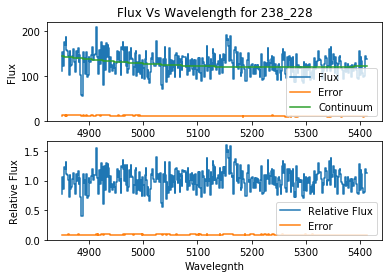

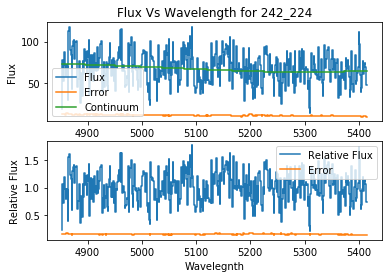

In [64]:
# 114, 226
for cx, cy in zip(xcen,ycen):
    data1 = ascii.read('/home/ahmed/astro/spectra/spectrum_tot_'+str(cx)+'_'+str(cy)+'.dat')
    wave = data1[0][:]
    flx = data1[1][:]
    flx_er = data1[2][:]
    minindex = 200
    maxindex = 650
    wave = wave[minindex:maxindex]
    flx = flx[minindex:maxindex]
    flx_er = flx_er[minindex:maxindex]
    minw = 5120.
    maxw = 5180.
    q = np.where((wave > minw) & (wave < maxw))
    wave_fit = np.delete(wave, q)
    flx_fit = np.delete(flx, q)
    cont = np.poly1d(np.polyfit(wave_fit,flx_fit,3))
    continuum = cont(wave)
    flx_norm = flx/continuum
    flx_er_norm = flx_er/continuum
    dat = Table([wave, flx, flx_er, continuum, flx_norm, flx_er_norm], names=['wave', 'flx', 'flx_er', 'continuum', 'flx_norm', 'flx_er_norm'])
    ascii.write(dat, '/home/ahmed/astro/spectra/spectrum_CIII_'+str(cx)+'_'+str(cy)+'.dat',overwrite=True)
    fig, ax= plt.subplots(2)
    ax[0].step(wave,flx,label='Flux')
    ax[0].step(wave,flx_er,label='Error')
    ax[0].step(wave,continuum,label='Continuum')
    ax[0].legend(loc=0)
    ax[0].set_title('Flux Vs Wavelength for '+str(cx)+'_'+str(cy)+'')
    ax[0].set_xlabel('Wavelength')
    ax[0].set_ylabel('Flux')
    
    ax[1].step(wave,flx_norm,label='Relative Flux')
    ax[1].step(wave,flx_er_norm,label='Error')
    ax[1].legend(loc=0)
    ax[1].set_xlabel('Wavelegnth')
    ax[1].set_ylabel('Relative Flux')
    plt.show()
    

z:  1.7031195358040012
[1.70311954 0.31171847 3.21833291]
[2.70200281e-04 5.63578204e-02 6.94529682e-01]


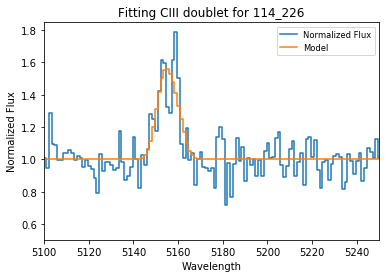

z:  1.7031706399077784
[1.70317064 0.71632288 1.55210257]
[1.38382866e-04 1.10037772e-01 2.52927991e-01]


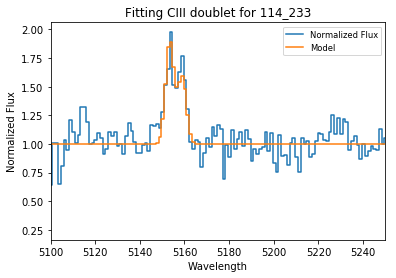

z:  1.7033495823476965
[1.70334958 1.04585418 1.25570531]
[1.09736706e-04 1.65757832e-01 2.15583030e-01]


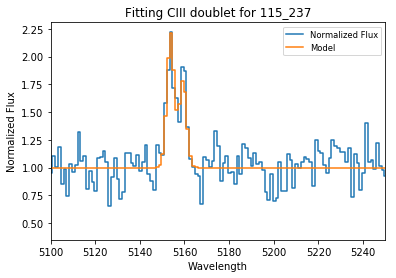

z:  1.7033205032120202
[1.7033205  0.96872595 1.08885971]
[7.20440771e-05 1.24791261e-01 1.52802786e-01]


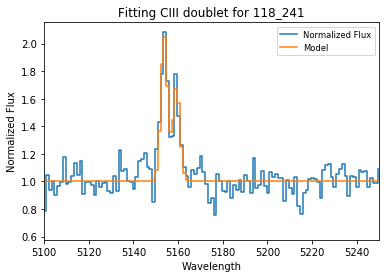

z:  1.7034095504595186
[1.70340955 0.68000257 1.34037012]
[9.78884451e-05 8.73150181e-02 1.83578577e-01]


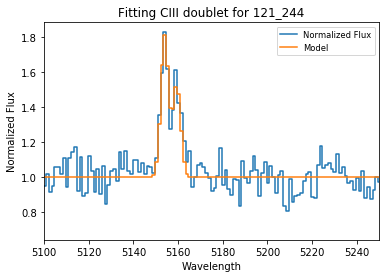

z:  1.7036207298187158
[1.70362073 1.49999998 0.58185148]
[6.00470602e-05 3.81532120e-01 1.48142028e-01]


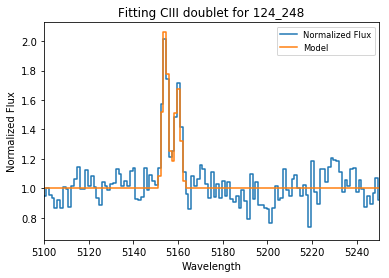

z:  1.7034902467085822
[1.70349025 1.08496185 0.9417247 ]
[7.50874660e-05 1.82925846e-01 1.75633994e-01]


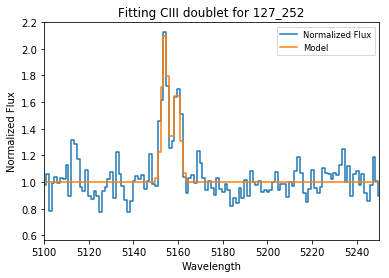

z:  1.7035286287292053
[1.70352863 1.00471272 1.08833757]
[1.33317226e-04 2.36314664e-01 2.82002768e-01]


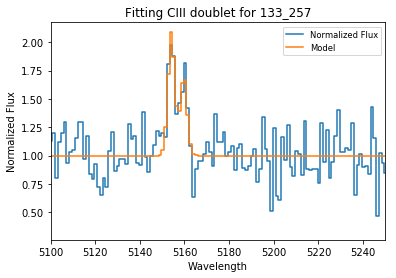

z:  1.70294756130491
[1.70294756 0.9107946  1.13823461]
[1.11776455e-04 1.67954714e-01 2.28816222e-01]


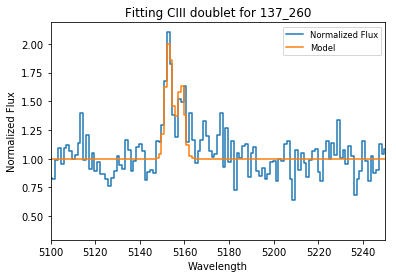

z:  1.7035046997514336
[1.7035047  0.20565597 4.26481084]
[3.99607348e-04 3.74047843e-02 9.30573640e-01]


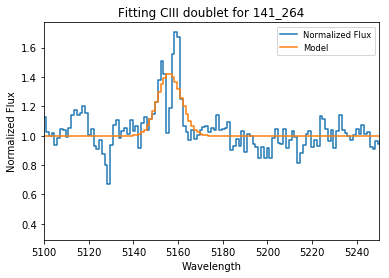

z:  1.7027002372679743
[1.70270024 1.07396606 0.82255047]
[1.74827773e-04 5.06780828e-01 4.33333978e-01]


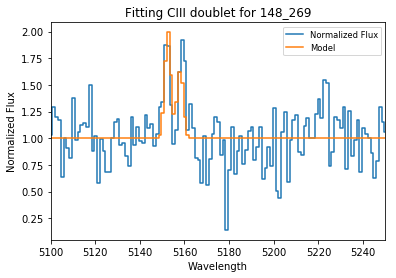

z:  1.702843694424713
[1.70284369 0.87710132 1.25413897]
[1.06514556e-04 1.33448869e-01 2.05327857e-01]


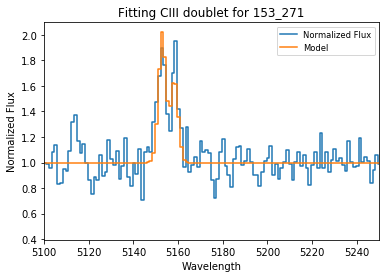

z:  1.7067389214215247
[1.70673892 0.64061336 0.8229989 ]
[3.02538075e-04 5.28039461e-01 7.62032323e-01]


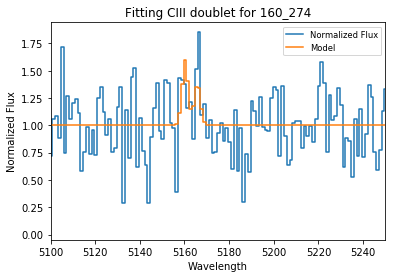

z:  1.7023865503418574
[1.70238655 1.5        0.45501155]
[1.43097369e-04 9.73776886e-01 2.26008398e-01]


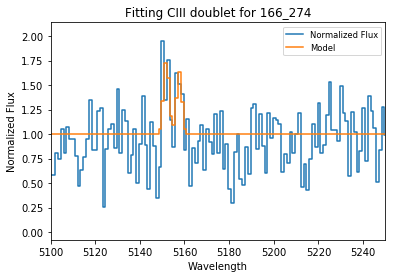

z:  1.7027975163037472
[1.70279752 0.26988879 3.64489198]
[4.28188553e-04 6.60671281e-02 1.07741003e+00]


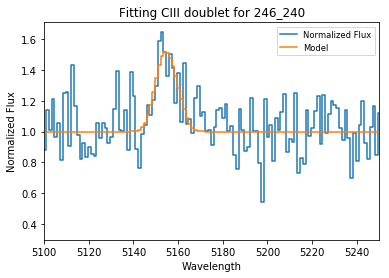

z:  1.703105076183865
[1.70310508 0.63463707 1.48474982]
[1.31631226e-04 9.67085765e-02 2.41566448e-01]


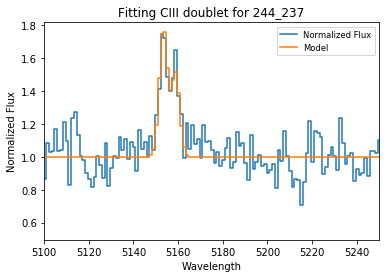

z:  1.7034459285104486
[1.70344593 0.50592715 1.42754756]
[1.30682732e-04 7.97354135e-02 2.40128217e-01]


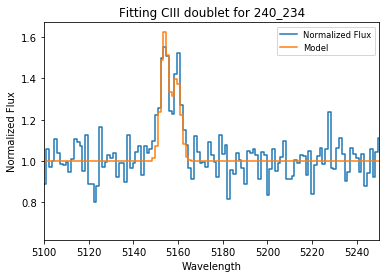

z:  1.7039276148111786
[1.70392761 0.47067256 1.56581694]
[2.66945960e-04 1.36559472e-01 4.85802385e-01]


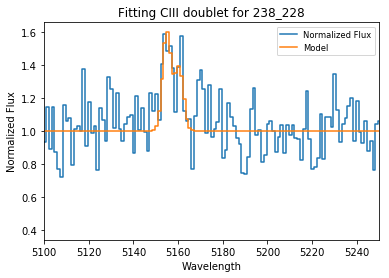

In [4]:
from astropy.convolution import convolve, Gaussian1DKernel
from astropy.io import ascii
from astropy.table import Table
def model_CIII(wave,z,tau,sigma):
    lam1 = 1906.683 #2324.21;
    lam1_obs = (1. + z) * lam1
    lam2 = 1908.734 #2325.40; 
    lam2_obs = (1. + z) * lam2
    c = 1.55 # Get the Doublet ratio
    F = 1. + c* tau * np.exp(- (wave - lam1_obs)**2. / (2. * sigma**2.)) + tau * np.exp(-(wave - lam2_obs)**2. / (2. * sigma**2.))
    muse_kernel = ((2.60364004044/1.25 )/ 2.355)#FWHM_avg = 2.50161030596 # Check the kernel for this part of the spectrum
    g = Gaussian1DKernel(stddev=muse_kernel)
    fmodel = convolve(F, g, boundary='extend')
    return fmodel
xcen = [114,114,115,118,121,124,127,133,137,141,148,153,160,166,246,244,240,238]
        #244,170,177,185,191,198,203,208,213,220,225,231,238,242
ycen = [226,233,237,241,244,248,252,257,260,264,269,271,274,274,240,237,234,228]
        #244,274,274,274,272,271,270,268,266,263,259,255,249,224
from astropy.wcs import WCS
w = WCS(header)
xcen_cord = []
ycen_cord = []
for cx, cy in zip(xcen, ycen):
    c=w.pixel_to_world_values(cx,cy,0)
    xcen_cord.append(c[0])
    ycen_cord.append(c[1])
from scipy.optimize import curve_fit
import os
cxs = []
cys = []
z = []
z_er = []
for cx, cy in zip(xcen, ycen):
    cxs.append(cx)
    cys.append(cy)
    data1 = ascii.read('/home/ahmed/astro/spectra/spectrum_CIII_'+str(cx)+'_'+str(cy)+'.dat')
    wave = data1[0][:]
    flx = data1[1][:]
    flx_er = data1[2][:]
    flx_norm = data1[4][:]
    flx_er_norm = data1[5][:]
    popt, pcov = curve_fit(model_CIII, wave, flx_norm,[1.7,1.,50.],sigma=flx_er_norm,bounds=([1.7,0.,0.],[1.72,1.5,1000.]))
    perr = np.sqrt(np.diag(pcov))
    print('z: ',popt[0])
    print(popt)
    print(perr)
    z.append(popt[0])
    z_er.append(perr[0])
    fig, ax = plt.subplots()
    ax.step(wave,flx_norm,label='Normalized Flux')
    ax.step(wave,model_CIII(wave,*popt),label='Model')
    ax.set_title('Fitting CIII doublet for '+str(cx)+'_'+str(cy)+'')
    ax.set_xlabel('Wavelength')
    ax.set_ylabel('Normalized Flux')
    ax.set_xlim([5100.,5250.])
    ax.legend(loc=0, fontsize='small')
    fig.savefig('/home/ahmed/astro/figures/fitting/Fit_CIII_'+str(cx)+'_'+str(cy)+'.pdf')
    plt.show()
info = Table([cxs, cys, xcen_cord, ycen_cord, z, z_er],names=['x-pixel','y-pixel','RA','Dec','redshift','error in redshift'])
ascii.write(info,'/home/ahmed/astro/spectra/redshift.dat',overwrite=True)

In [51]:
from astropy.wcs import WCS
w = WCS(header)
xcen_cord = []
ycen_cord = []
for cx, cy in zip(xcen, ycen):
    c=w.pixel_to_world_values(cx,cy,0)
    xcen_cord.append(c[0])
    ycen_cord.append(c[1])

print(xcen_cord)
print(ycen_cord)

[array(51.86825603), array(51.86825602), array(51.8681989), array(51.86802754), array(51.86785618), array(51.86768482), array(51.86751346), array(51.86717074), array(51.86694227), array(51.86671379), array(51.86631395), array(51.86602836), array(51.86562853), array(51.86528582), array(51.86505734), array(51.86465751), array(51.86420057), array(51.86385785), array(51.86345803), array(51.86317243), array(51.86288684), array(51.86260125), array(51.86220141), array(51.86191582), array(51.8615731), array(51.86117327), array(51.86083055), array(51.86071631), array(51.86083055), array(51.86105902), array(51.86117326), array(51.86094478)]
[array(-13.43710964), array(-13.43672075), array(-13.43649853), array(-13.43627631), array(-13.43610964), array(-13.43588742), array(-13.4356652), array(-13.43538743), array(-13.43522077), array(-13.43499855), array(-13.43472077), array(-13.43460967), array(-13.434443), array(-13.434443), array(-13.43444301), array(-13.43444301), array(-13.43444301), array(-1

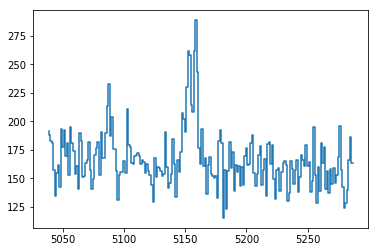

In [63]:
#114, 226, spectrum_tot_114_226.dat
spec = ascii.read('/home/ahmed/astro/spectra/spectrum_tot_114_226.dat')
wave = spec[0][:]
flx = spec[1][:]
i = 350
f = 550
plt.step(wave[i:f],flx[i:f])
plt.show()